# Author: NIMISHA SUNNY

# TSF GRIP TASK :3

# Prediction using Decision Tree Algorithm

(Level - Intermediate)

Dataset : https://bit.ly/3kXTdox

### Import pakages

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.tree import export_graphviz
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

### Load Dataset of Iris

In [2]:
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)# Feature vector
print(df.head(5))

y=pd.DataFrame(iris.target)  #Target variable
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]


In [4]:
df.isnull().sum() # check any null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


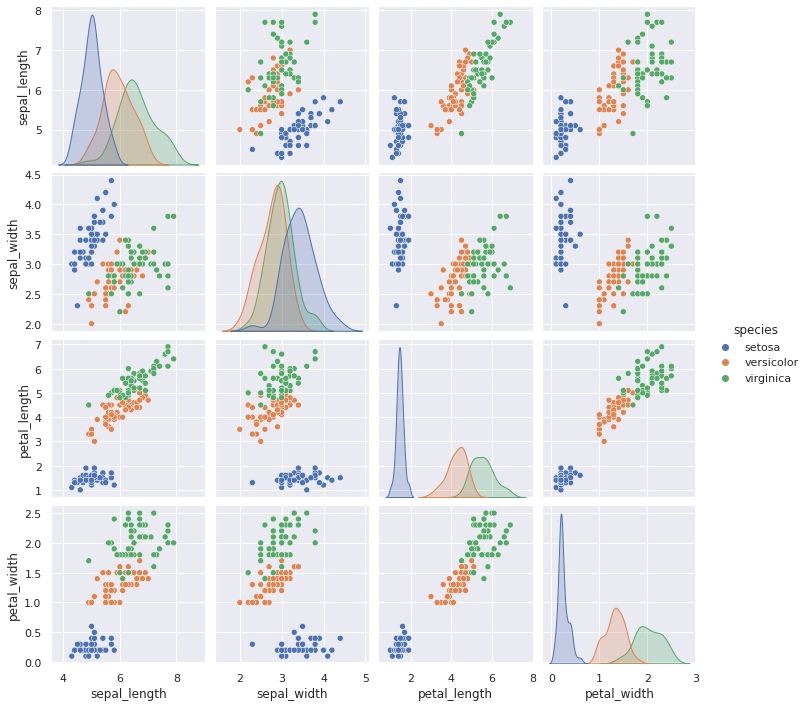

In [8]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=2.5);

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Heat Map

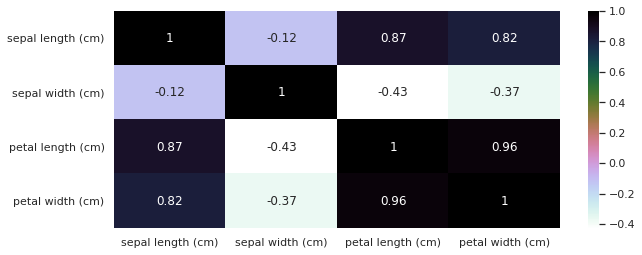

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap="cubehelix_r")
plt.show()

In [12]:
dummy =pd.get_dummies(iris['species'])# crreate dummy variable for species
dummy.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Splitting of dataset for test & train 

In [13]:
X_train,X_test,y_train,y_test= train_test_split(df,y, random_state = 101, stratify=y, test_size=0.2)

### Fitting the model

In [14]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
r= model.fit(X_train,y_train)

### Determine the shape of train & test

In [16]:
X_train.shape,y_train.shape

((120, 4), (120, 1))

In [17]:
X_test.shape,y_test.shape

((30, 4), (30, 1))

### Accuracy of test & train data
    

In [18]:
model.score(X_test, y_test )

0.9666666666666667

In [19]:
model.score(X_train, y_train )

1.0

In [20]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)



0.9666666666666667

### Predict the model

In [21]:
model.predict(X_test)

array([0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 0, 2, 2])

In [22]:
model.predict(X_train)

array([2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0,
       1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 0])

### Changing maximum depth

In [25]:
tra_acc=[]
tes_acc=[]
for i in range(1,10):
    treer= DecisionTreeClassifier(max_depth=i,random_state=10)
    treer.fit(X_train,y_train)
    tra_acc.append(treer.score(X_train,y_train))
    tes_acc.append(treer.score(X_test,y_test))

In [26]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':tra_acc, 'valid_acc':tes_acc})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.666667,0.666667
1,2,0.958333,0.966667
2,3,0.975000,0.966667
3,4,1.000000,0.966667
4,5,1.000000,0.966667


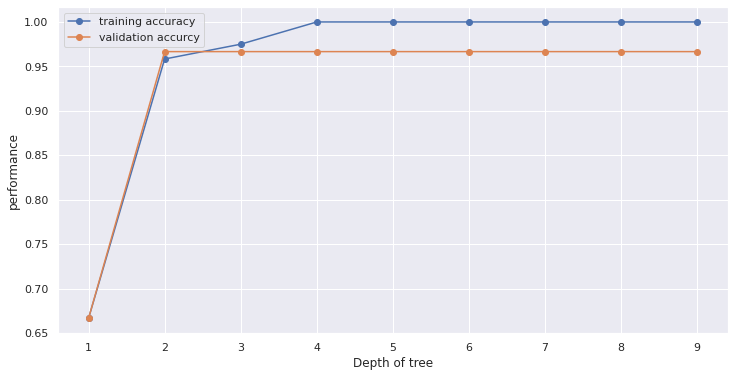

In [27]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='training accuracy')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o',label='validation accurcy')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

The above graph shows clear view regarding the training and validation accuracy

### Other methods to avoid  overfitting are:
max_leaf_nodes

min_samples_split

min_samples_leaf

Plot The **DecisionTreeClassifier**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


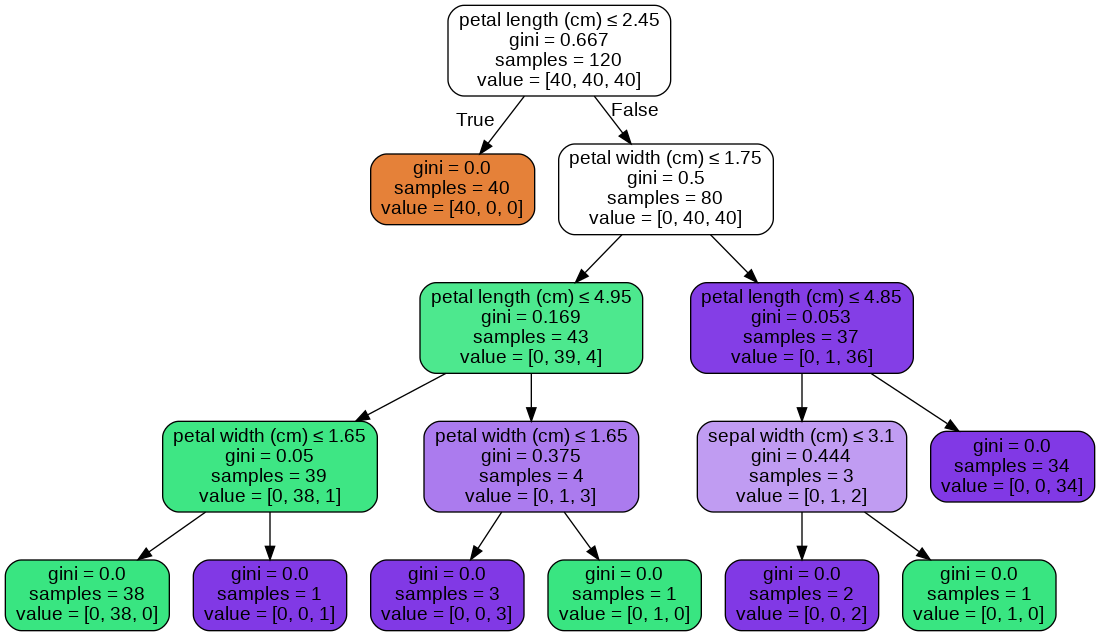

In [28]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(r, out_file=dot_data, feature_names=X_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
!pip install dtreeviz

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 40.9MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-cp36-none-any.whl size=52359 sha256=eb964e84b35c5f772dbcfbf5c6d29a016f990c6f96d7345b454c7db7d19626fe
  Stored in directory: /root/.cache/pip/wheels/6c/42/13/06bfd7ecac5313d2bea233a1e1165fec14a4d3680fa856db57
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=1b22593b13a1b3e9e82b6447e572d2617f7e1724e6bed5d5a31b3075ab2d7475
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [41]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


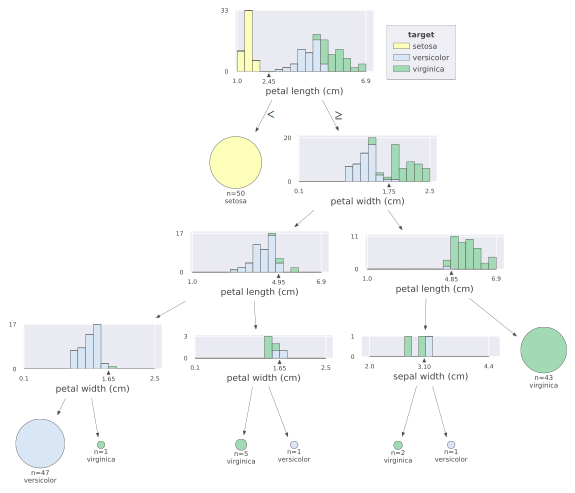

In [43]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(r, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

# THANK YOU